In [ ]:
# Update the Genetic Algorithm for solving real-valued optimization problems.

# Requirements:
# Prepare 3 real-valued test functions: Sphere, Schwefel and Rastrigin
# Prepare functions for encoding and decoding between binary string and decimal value (binary coded decimal - BCD)
# when decoding from binary, make sure that the resulting decimal value makes sense (1111 cannot be F, but 9 instead)

# Test the Genetic Algorithm on prepared test functions, settings:
# Dimension - 10
# Generations - 1000
# Population size - 20
# Elitism - 20%
# Mutation probability - 2%
# Decimal precision - 4 digits after the decimal point
# Show convergence graphs and basic descriptive statistics

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define real-valued test functions
def sphere(x):
    return np.sum(x**2)

def schwefel(x):
    return 418.9829 * len(x) - np.sum(x * np.sin(np.sqrt(np.abs(x))))

def rastrigin(x):
    return 10 * len(x) + np.sum(x**2 - 10 * np.cos(2 * np.pi * x))

In [ ]:
# Encoding and decoding functions for Binary Coded Decimal (BCD)
def encode_bcd(x, precision):
    scale_factor = 10**precision
    integer_part = np.round(x).astype(int)
    decimal_part = np.round((x - integer_part) * scale_factor).astype(int)
    return np.concatenate((integer_part, decimal_part))

def decode_bcd(encoded, precision):
    integer_part = encoded[:len(encoded)//2]
    decimal_part = encoded[len(encoded)//2:]
    decoded = integer_part + decimal_part / (10**precision)
    return decoded

In [ ]:
# Updated Genetic Algorithm for real-valued optimization with BCD encoding and decoding
def real_valued_genetic_algorithm_bcd(objective_function, n, population_size, elitism_percentage, mutation_probability_percentage, generations, precision):
    elitism = int(population_size * elitism_percentage / 100)
    mutation_probability = mutation_probability_percentage / 100

    best_solution = None
    best_solution_history = []

    for _ in range(generations):
        population = np.random.uniform(size=(population_size, n))
        encoded_population = encode_bcd(population, precision)
        fitness = [objective_function(decode_bcd(individual, precision)) for individual in encoded_population]
        best_solution_index = np.argmax(fitness)
        best_solution_history.append(fitness[best_solution_index])

        if best_solution is None or fitness[best_solution_index] > objective_function(decode_bcd(best_solution, precision)):
            best_solution = encoded_population[best_solution_index]

        sorted_indices = np.argsort(fitness)[::-1]
        next_generation = encoded_population[sorted_indices[:elitism]]

        while len(next_generation) < population_size:
            parents = encoded_population[np.random.choice(population_size, size=2, replace=False)]
            crossover_point = np.random.randint(n)
            child1 = np.concatenate((parents[0][:crossover_point], parents[1][crossover_point:]))
            child2 = np.concatenate((parents[1][:crossover_point], parents[0][crossover_point:]))
            child1 = np.where(np.random.rand(n) < mutation_probability, 1 - child1, child1)
            child2 = np.where(np.random.rand(n) < mutation_probability, 1 - child2, child2)
            next_generation = np.vstack((next_generation, child1, child2))

        population = next_generation

    return best_solution, best_solution_history

In [ ]:
# Test the Genetic Algorithm on real-valued test functions with BCD encoding and decoding
# Set parameters
n = 10
population_size = 20
elitism_percentage = 20
mutation_probability_percentage = 2
generations = 1000
precision = 4

In [ ]:
# Define real-valued test functions
test_functions = [sphere, schwefel, rastrigin]

Objective Function: sphere
Best: 114958759.03494774, Worst: 103200127.23763055, Average: 107981801.48527074, Median: 107498680.3857972, Std Deviation: 3112675.776685417


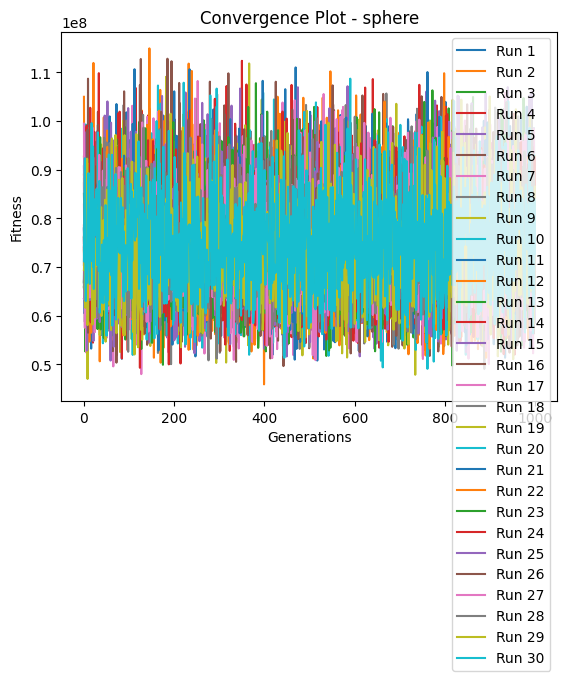

Objective Function: schwefel
Best: 22802.19322789465, Worst: 18378.941736663463, Average: 20145.495289871797, Median: 20124.42435421624, Std Deviation: 1065.1387987232786


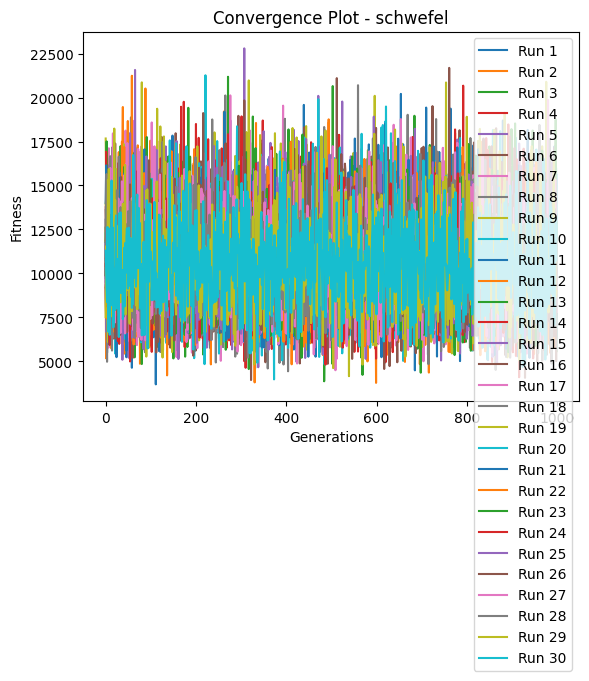

Objective Function: rastrigin
Best: 119613098.30134366, Worst: 103953191.41152869, Average: 109888245.00852802, Median: 108579541.17881012, Std Deviation: 4076221.983441753


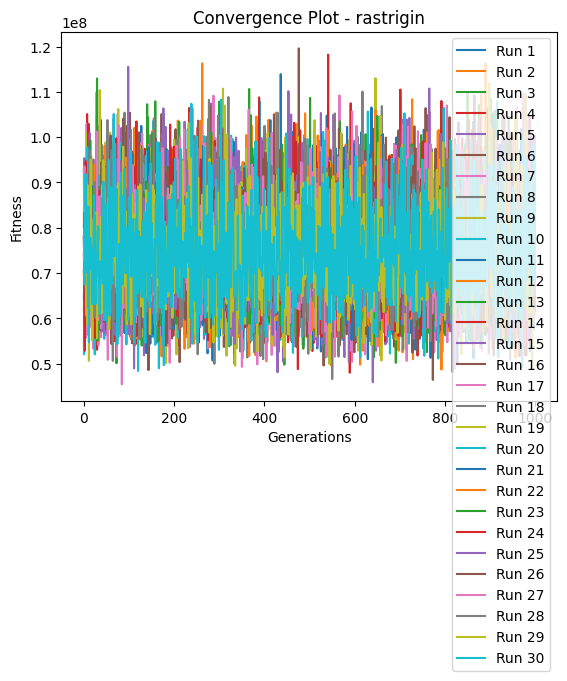

In [ ]:
# Store the results for each function
results_dict = {func.__name__: [] for func in test_functions}
best_results_dict = {func.__name__: [] for func in test_functions}

for objective_function in test_functions:
    results = []
    best_results = []
    for _ in range(30):
        best_solution, best_solution_history = real_valued_genetic_algorithm_bcd(objective_function, n, population_size, elitism_percentage, mutation_probability_percentage, generations, precision)
        results.append(objective_function(decode_bcd(best_solution, precision)))
        best_results.append(best_solution_history)

        # Store results for each function
        results_dict[objective_function.__name__].append(objective_function(decode_bcd(best_solution, precision)))
        best_results_dict[objective_function.__name__].append(best_solution_history)

    # Calculate statistics
    best = max(results)
    worst = min(results)
    average = np.mean(results)
    median = np.median(results)
    std_deviation = np.std(results)

    print(f"Objective Function: {objective_function.__name__}")
    print(f"Best: {best}, Worst: {worst}, Average: {average}, Median: {median}, Std Deviation: {std_deviation}")

    # Plot the convergence plot for all 30 runs
    for i, best_solution_history in enumerate(best_results):
        plt.plot(best_solution_history, label=f"Run {i + 1}")
    plt.xlabel("Generations")
    plt.ylabel("Fitness")
    plt.title(f"Convergence Plot - {objective_function.__name__}")
    plt.legend()
    plt.show()

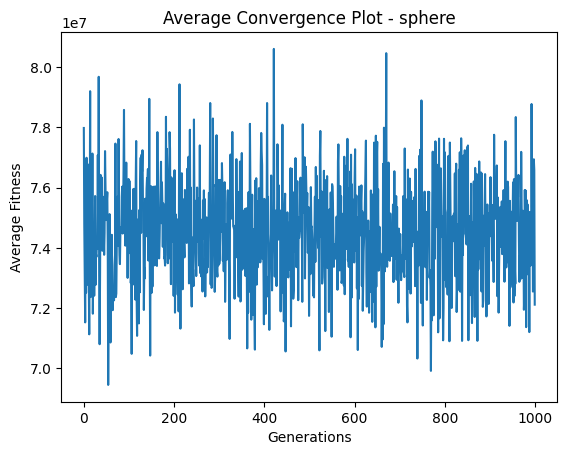

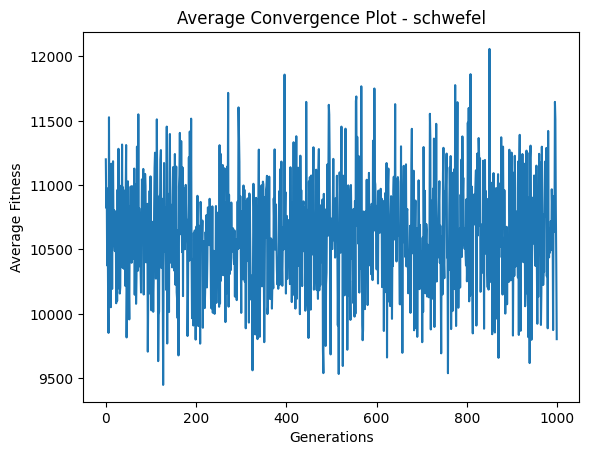

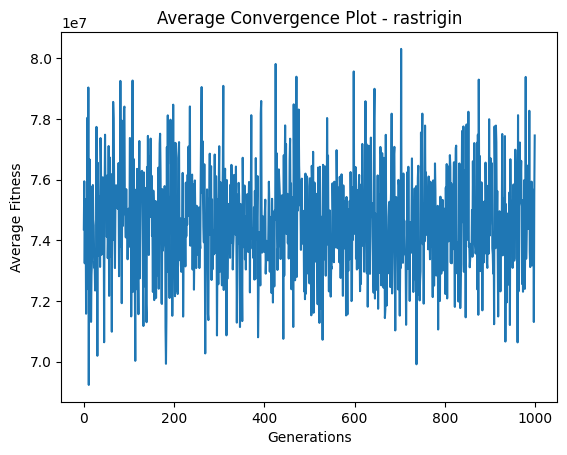

In [ ]:
# Show the average convergence plot for each function
for objective_function in test_functions:
    average_history = np.mean(best_results_dict[objective_function.__name__], axis=0)
    plt.plot(average_history)
    plt.xlabel("Generations")
    plt.ylabel("Average Fitness")
    plt.title(f"Average Convergence Plot - {objective_function.__name__}")
    plt.show()